<a href="https://colab.research.google.com/github/samarthsoni17/Quantum_FDP/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Date: 28-09-2021

In [1]:
pip install qiskit

     |████████████████████████████████| 6.1 MB 2.7 MB/s 
     |████████████████████████████████| 17.9 MB 99 kB/s 
     |████████████████████████████████| 235 kB 57.4 MB/s 
     |████████████████████████████████| 207 kB 60.0 MB/s 
     |████████████████████████████████| 2.1 MB 17.3 MB/s 
     |████████████████████████████████| 207 kB 46.3 MB/s 
     |████████████████████████████████| 1.4 MB 45.2 MB/s 
     |████████████████████████████████| 634 kB 54.5 MB/s 
     |████████████████████████████████| 52 kB 1.2 MB/s 
     |████████████████████████████████| 38.2 MB 25 kB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 943 kB 49.1 MB/s 
     |████████████████████████████████| 3.5 MB 47.3 MB/s 
     |████████████████████████████████| 6.3 MB 23.1 MB/s 
  Created wheel for qiskit: filename=qiskit-0.30.1-py3-none-any.whl size=11697 sha256=09f5977c5d275d0ed2f0a21b12446d64e732add21abdca56220f59a7da98c7f3
  Stored in directory: /root/.cache/pip/whee

In [2]:
from qiskit import *

In [3]:
qr = QuantumRegister (1) #quantum reg of size 1

In [4]:
cr = ClassicalRegister (1) #classical reg of size 1

In [5]:
qc = QuantumCircuit (qr, cr)

In [6]:
qc.draw() #see how the circuit looks like

q0_0: 
      
c0: 1/

In [7]:
qc.x( qr[0] ) #NOT gate

In [8]:
qc.draw()

┌───┐
q0_0: ┤ X ├
      └───┘
c0: 1/═════

In [9]:
qc.measure( qr, cr ) #to measure value of qubit; syntax; measure value stored in qr and store it in cr

In [10]:
qc.draw() #see the cirucit

┌───┐┌─┐
q0_0: ┤ X ├┤M├
      └───┘└╥┘
c0: 1/══════╩═
            0

In [11]:
simulator = BasicAer.get_backend( 'qasm_simulator' ) #assign qasm simulator to simulator variable

In [12]:
result = execute( qc, backend = simulator ).result() #takes quantum circuit and uses backend to execute the circuit, then stres that in result

In [13]:
from qiskit.tools.visualization import plot_histogram

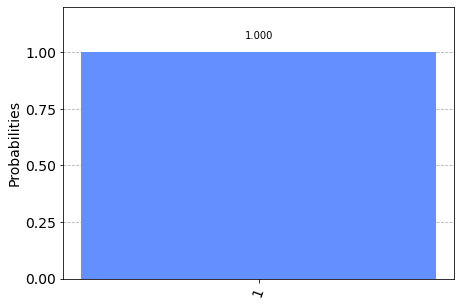

In [14]:
plot_histogram (result.get_counts(qc)) #counts how many times the value 0 or 1 was hit; no error since simulator simulates the ideal scenario

In [15]:
IBMQ.save_account('a6dd194c45ad9dd4747dbd3d27b977dc135ca1501df4d1da82894f64c4e08ad919abd4a89a8bec80f97acb3260b88e75be0db24b454d6a1f6d5c5a215074105a') #save your IBM account for this session

In [16]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [17]:
provider = IBMQ.get_provider('ibm-q') #IBM Q will be our provider

In [18]:
qcomp = provider.get_backend('ibmq_armonk') #first we chose a simulator. Now, we choose a real q computer from the list of available services at IBM website

In [19]:
 job = execute( qc, backend = qcomp ) #qc will be a circuit as a parameter and backend will be the qcomp we just initialised

In [20]:
from qiskit.tools.monitor import job_monitor #to monitor our job

In [21]:
job_monitor( job )

Job Status: job has successfully run


In [22]:
result1 = job.result()

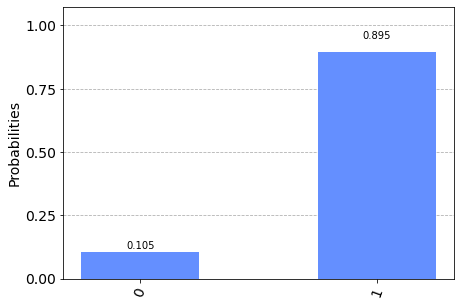

In [23]:
plot_histogram ( result1.get_counts( qc ) ]) #already imported before. The slight deviation from "1" is due to the quantum noise/error in the quantum device

Lets use Hadamard gate

In [24]:
# from qiskit import *
qrH = QuantumRegister( 2 ) #quantum register of size 2
crH = ClassicalRegister ( 2 ) #classical register of size 2
qcH = QuantumCircuit( qrH, crH ) 
qcH.draw()

q17_0: 
       
q17_1: 
       
 c1: 2/

In [25]:
qcH.h( qrH[0] ) # hadamard gate on first qubit

In [26]:
qcH.draw()

┌───┐
q17_0: ┤ H ├
       └───┘
q17_1: ─────
            
 c1: 2/═════

In [27]:
qcH.cx( qrH[0], qrH[1] ) #0th qubit as control, 1st qubit as the target   

In [28]:
qcH.draw()

┌───┐     
q17_0: ┤ H ├──■──
       └───┘┌─┴─┐
q17_1: ─────┤ X ├
            └───┘
 c1: 2/══════════

In [29]:
qcH.measure( qrH, crH )

In [30]:
qcH.draw()

┌───┐     ┌─┐   
q17_0: ┤ H ├──■──┤M├───
       └───┘┌─┴─┐└╥┘┌─┐
q17_1: ─────┤ X ├─╫─┤M├
            └───┘ ║ └╥┘
 c1: 2/═══════════╩══╩═
                  0  1

In [31]:
#let us execute this using simulator
simulator1 = Aer.get_backend( 'qasm_simulator' )
result2 = execute( qcH, backend = simulator ).result()

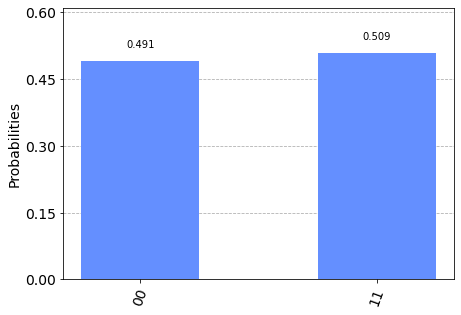

In [32]:
plot_histogram( result2.get_counts( qcH ) ) #we get a slight error this time not because of the simulator but because the Hadamard gate is not ideal...

In [33]:
#let us execute this using Q computer; no need to load the same account again
# IBMQ.save_account( 'a6dd194c45ad9dd4747dbd3d27b977dc135ca1501df4d1da82894f64c4e08ad919abd4a89a8bec80f97acb3260b88e75be0db24b454d6a1f6d5c5a215074105a' )
# IBMQ.load_account() 
provider1 = IBMQ.get_provider( 'ibm-q' )
qcomp1 = provider1.get_backend( 'ibmq_quito' )
job1 = execute( qcH, backend = qcomp1 )
result3 = job1.result() 

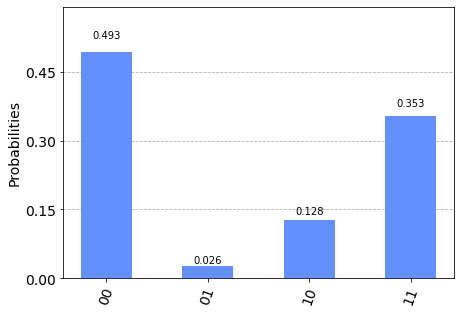

In [34]:
plot_histogram( result3.get_counts( qcH ) ) #due to imperfect quantum computer, even 10 and 01 have some values